In [132]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns

In [133]:
dataset="Alimentos - copia.xlsx"
dataf= pd.read_excel(dataset)
data= dataf.values
x=data[:,:-1]
y=data[:,-1]

In [134]:
dataf.head(10)
#sns.regplot(x="Proteina_(g)", y="Energ_Kcal", data=dataf)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


El dataset tiene 4898 registros, de 11 dimensiones


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

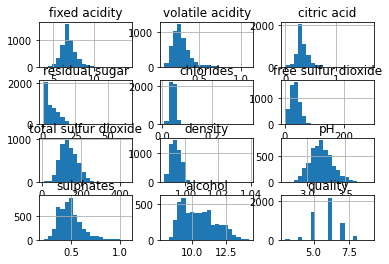

In [135]:
n,d=x.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))
# visualizar distribución de los datos
dataf.hist(bins=20)

In [136]:
porc_test= 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= porc_test)
print("\t %d datos para training" %x_train.shape[0])
print("\t %d datos para testing" %x_test.shape[0])

	 3918 datos para training
	 980 datos para testing


In [137]:
#%% Entrenar modelo de Regresión Lineal

# Creación del objeto modelo
modelo= LinearRegression()

# Entrenar el modelo.
modelo.fit(x_train, y_train)

# Realizar predicción
y_train_predict= modelo.predict(x_train) # Con los datos de entrenamiento.
y_test_predict= modelo.predict(x_test)  # Con los datos de prueba.

# Evaluar los scores
error_train= mean_squared_error(y_train_predict, y_train)
print("Error en training: %s" % error_train)
error_test= mean_squared_error(y_test_predict, y_test)
print("Error en testing: %s" % error_test)


Error en training: 0.5578302312898884
Error en testing: 0.5985281070121096


In [138]:
#%% Evaluar con datos de Testing
nuevo= 25
x_nuevo=x_test[nuevo, :] # Tomamos uno de los datos.
#print(x_nuevo) # Lo miramos.
y_real= y_test[nuevo] # Tomamos la anotación real.
y_predict= modelo.predict(x_nuevo.reshape(1, -1)) # Le preguntamos al modelo su predicción.

# Comparamos.
print("\nNuevo dato:\nEl modelo predice: %f " % (y_predict) )
print("El valor real es: %f" % (y_real))


Nuevo dato:
El modelo predice: 5.149171 
El valor real es: 4.000000
